# 「對比度」指光與暗之間的差異。

對比度可以想像成圖片中亮部與暗部的差距，當對比度越高時，畫面中亮暗差距就越明顯，
如果用直方圖來想像的話，可以想像成當調整對比度變高時，直方圖的像素應該會往左右兩側擴散，
也就是已經「黑的越黑，白的越白」。而是調低的話，則直方圖應該會往中間集中。

對比度是對整張照片作用的，影響整個畫面的明暗反差程度。讓亮的地方更亮、暗的地方更暗。
可以稍微加一點對比度，臉部更立體清晰。

簡單地說，要使人臉層次更分明，就可以提高一點對比度。

https://engoo.com.tw/blog/%E3%80%90%E4%B8%BB%E9%A1%8C%E5%96%AE%E5%AD%97%E3%80%91%E4%BF%AE%E5%9C%96app%E9%83%BD%E6%98%AF%E8%8B%B1%E6%96%87%E7%9C%8B%E4%B8%8D%E6%87%82%EF%BC%9F%E8%B7%9F%E4%BF%AE%E5%9C%96%E3%80%81%E7%85%A7/

https://ithelp.ithome.com.tw/articles/10219730

https://www.itdaan.com/tw/50859156abb7ff6eb099b301cb74f130

https://kknews.cc/zh-tw/n/6rknx8v.html

https://zhuanlan.zhihu.com/p/26889255

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def modify_intensity(img):
    image = img
    maxIntensity = 255.0 # depends on dtype of image data
    x = np.arange(maxIntensity) 
    
    # Parameters for manipulating image data
    phi = 1
    theta = 1

    # Increase intensity such that
    # dark pixels become much brighter, 
    # bright pixels become slightly bright
    newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
    newImage0 = np.array(newImage0, dtype=np.uint8)

    print("Increase intensity :")
    show_img(newImage0)

    y = (maxIntensity/phi)*(x/(maxIntensity/theta))**0.5

    # Decrease intensity such that
    # dark pixels become much darker, 
    # bright pixels become slightly dark 
    newImage1 = (maxIntensity/phi)*(image/(maxIntensity/theta))**2
    newImage1 = np.array(newImage1, dtype=np.uint8)

    print("Decrease intensity :")
    show_img(newImage1)

    z = (maxIntensity/phi)*(x/(maxIntensity/theta))**2

    print("Intensity changes:")
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y, 'r-', label='Increase intensity')
    line2, = ax.plot(x, x, 'k:', label='Origin intensity')
    line3, = ax.plot(x, z, 'b-', label='Decrease intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    
    ax.legend()
    plt.show()

In [4]:
def modify_contrast_and_brightness(img):
    array_alpha = np.array([2.25]) # contrast 
    array_beta = np.array([-100.0]) # brightness

    # add a beta value to every pixel 
    cv2.add(img, array_beta, img)                    

    # multiply every pixel value by alpha
    cv2.multiply(img, array_alpha, img)  
    print("Increased contrast2 : ")
    show_img(img)

In [5]:
def modify_contrast(img):
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel

    lab = cv2.merge((l2,a,b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    print("Increased contrast : ")
    show_img(img2)


In [6]:
def img_processing(img):
    # do something here
    modify_intensity(img)
    modify_contrast(img)
    modify_contrast_and_brightness(img)
    

origin picture:


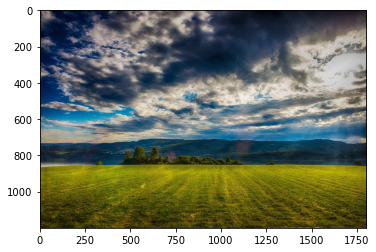

Increase intensity :


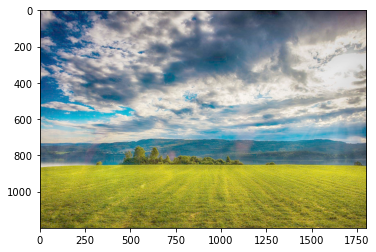

Decrease intensity :


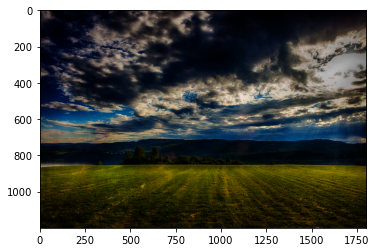

Intensity changes:


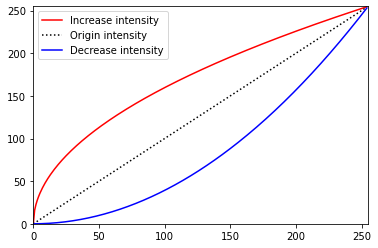

Increased contrast : 


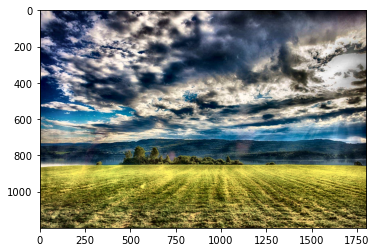

Increased contrast2 : 


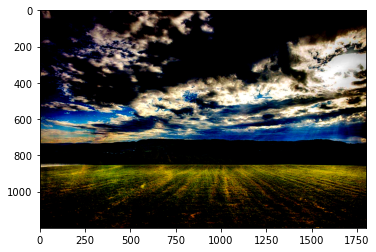

In [7]:
file_name = "./testdata/scenery.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

result_img = img_processing(origin_img)
# show_img(result_img)